# Rule Curves for Rainy and Namakan Lakes

### Initializations

In [33]:
# Display graphics inline with the notebook
%matplotlib inline

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
import os
import datetime

# Modules to display images and data tables
from IPython.display import Image
from IPython.core.display import display

# set graphics context
sns.set_context('talk')

# directories
dir = '../data/'
img = '../images/'

### Plotting Functions

In [34]:
# plot rule curve with a specified color
def plotRC(RC,color,alpha=0.5):
    plt.plot(RC.index,RC['EHW'],color=color,alpha=alpha)
    plt.plot(RC.index,RC['ELW'],color=color,alpha=alpha)
    plt.plot(RC.index,RC['AGO'],color+'--',alpha=alpha)
    RC['LRC'].plot(color=color,lw=3,alpha=alpha)
    RC['URC'].plot(color=color,lw=3,alpha=alpha)
    if 'EDL' in RC.columns:
        RC['EDL'].plot(color=color,lw=3,alpha=alpha)
    plt.fill_between(RC.index,
                 RC['LRC'].tolist(),
                 RC['URC'].tolist(),
                 color=color, alpha=alpha)
    
    plt.ylabel('meters')
    plt.ylim(336,341.5)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    
# add right hand y-axis scaled in feet
def twiny():
    ax1 = plt.gca()
    locs = ax1.get_yticks()
    y1,y2 = ax1.get_ylim()
    ax2 = plt.twinx()
    ax2.set_ylim(y1,y2)
    lbls = ['{0:.2f}'.format(y*3.2808) for y in locs]
    ax2.set_yticklabels(lbls)
    plt.grid(None)
    ax2.set_ylabel('feet')

def saveRC(fname):
    fname = img + fname
    plt.savefig(fname)
    !convert $fname -trim $fname

## Definitions

* The rule curves consist of upper and lower bounds on the levels of Namakan and Rainy Lakes during normal conditions. The 1970 Supplementary Order requires the dam operator, insofar as possible, keep the lake levels between these bounds. The 2000 Supplementary Order further requires the dam operators to target the middle of the rule curve bands.
* The 1970 Supplementary Order defines emergency conditions for Namakan and Rainy Lakes. A high water emergency conditions exists if a lake level exceeds a specified elevation when inflows are greater than the dam outflow capacity. The low water emergency condition occurs if the lake level falls below a threshold elevation when the lake outflow is below a specified minimum.
* The 2000 Supplementary Order further specifies 'drought lines' for both lakes. Dam operators may further restrict outflow when lake levels fall below the drought line.
* The 1970 Supplementary Order specified a threshold high water level for each lake such that, if the lake level exceeds the threshold, the dam operators must open all gates and fishways.

## 1949 Rule Curves for Rainy and Namakan Lakes

In [35]:
# Generic Year to represent data
yr = 2014

# Rainy Lake
RL1949  = {
    datetime.datetime(yr, 1, 1): [1104.61, 1107.11, 1107.11, 1108.11, 1108.61],
    datetime.datetime(yr, 2, 1): [1104.61, 1106.61, 1106.61, 1108.11, 1108.61],
    datetime.datetime(yr, 3, 1): [1104.61, 1105.61, 1105.61, 1108.11, 1108.61],
    datetime.datetime(yr, 4, 1): [1104.61, 1104.61, 1104.61, 1108.11, 1108.61],
    datetime.datetime(yr, 5, 1): [1104.61, 1106.61, 1106.61, 1108.11, 1108.61],
    datetime.datetime(yr, 6, 1): [1104.61, 1107.61, 1107.61, 1108.11, 1108.61],
    datetime.datetime(yr, 7, 1): [1104.61, 1108.11, 1108.11, 1108.11, 1108.61],
    datetime.datetime(yr, 8, 1): [1104.61, 1108.11, 1108.11, 1108.11, 1108.61],
    datetime.datetime(yr, 9, 1): [1104.61, 1108.11, 1108.11, 1108.11, 1108.61],
    datetime.datetime(yr,10, 1): [1104.61, 1108.11, 1108.11, 1108.11, 1108.61],
    datetime.datetime(yr,11, 1): [1104.61, 1108.11, 1108.11, 1108.11, 1108.61],
    datetime.datetime(yr,12, 1): [1104.61, 1107.61, 1107.61, 1108.11, 1108.61],
    datetime.datetime(yr,12,31): [1104.61, 1107.11, 1107.11, 1108.11, 1108.61]
}

RL1949 = pd.DataFrame.from_dict(RL1949).transpose()/3.2808
RL1949.columns = ['ELW','LRC','URC','EHW','AGO']
RL1949 = RL1949.resample(rule='1D').interpolate()

# Namakan Lake
NL1949 = {    
    datetime.datetime(yr, 1, 1): [1108.61, 1113.61, 1113.61, 1118.61, 1119.1],
    datetime.datetime(yr, 2, 1): [1108.61, 1111.91, 1111.91, 1118.61, 1119.1],
    datetime.datetime(yr, 3, 1): [1108.61, 1110.31, 1110.31, 1118.61, 1119.1],
    datetime.datetime(yr, 4, 1): [1108.61, 1108.61, 1108.61, 1118.61, 1119.1],
    datetime.datetime(yr, 5, 1): [1108.61, 1111.91, 1111.91, 1118.61, 1119.1],
    datetime.datetime(yr, 6, 1): [1108.61, 1115.31, 1115.31, 1118.61, 1119.1],
    datetime.datetime(yr, 7, 1): [1108.61, 1118.61, 1118.61, 1118.61, 1119.1],
    datetime.datetime(yr, 8, 1): [1108.61, 1118.61, 1118.61, 1118.61, 1119.1],
    datetime.datetime(yr, 9, 1): [1108.61, 1118.61, 1118.61, 1118.61, 1119.1],
    datetime.datetime(yr,10, 1): [1108.61, 1118.61, 1118.61, 1118.61, 1119.1],
    datetime.datetime(yr,11, 1): [1108.61, 1116.91, 1116.91, 1118.61, 1119.1],
    datetime.datetime(yr,12, 1): [1108.61, 1115.31, 1115.31, 1118.61, 1119.1],
    datetime.datetime(yr,12,31): [1108.61, 1113.61, 1113.61, 1118.61, 1119.1]
}

NL1949 = pd.DataFrame.from_dict(NL1949).transpose()/3.2808
NL1949.columns = ['ELW','LRC','URC','EHW','AGO']
NL1949 = NL1949.resample(rule='1D').interpolate()

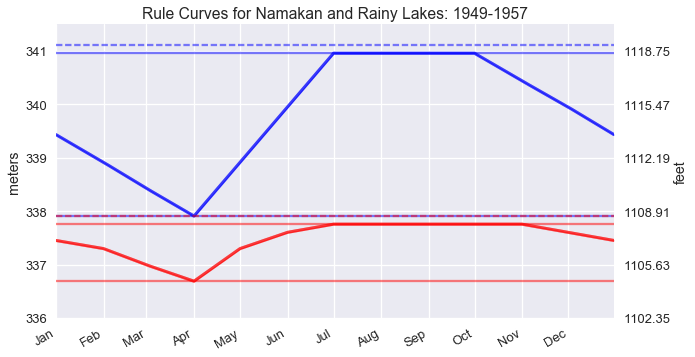

In [44]:
plt.figure(figsize=(10,6))
plotRC(NL1949,'b')
plotRC(RL1949,'r')
twiny()
plt.title('Rule Curves for Namakan and Rainy Lakes: 1949-1957')
saveRC('RuleCurve1949.png')

## 1957 Rule Curves for Rainy and Namakan Lakes

The adjustments that created the 1957 rule curve orders were based on the following conclusions:

1. The 1949 rule curve order was basically satisfactory, despite the flooding experienced in 1950 and 1954.
2. The terms of the 1949 order were essentially met except for the flood years.
3. No change in the curve order for Rainy Lake.
4. Add more flexibility and a maximum level for Namakan for the period from October 1 to June 1.
5. No changes recommended to the controls provided the operators make prompt changes in outflow.

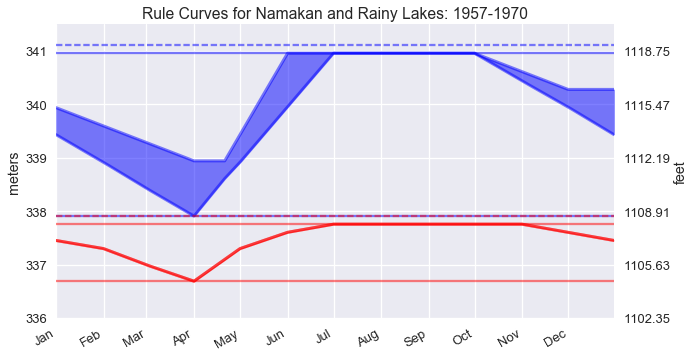

In [43]:
# Generic Year to represent data
yr = 2014

# Rainy Lake
RL1957 = RL1949.copy()

# Namakan Lake
NL1957 = {    
    datetime.datetime(yr, 1, 1): [1108.61, 1113.61, 1115.27, 1118.61, 1119.1],
    datetime.datetime(yr, 2, 1): [1108.61, 1111.91, 1114.14, 1118.61, 1119.1],
    datetime.datetime(yr, 3, 1): [1108.61, 1110.31, 1113.13, 1118.61, 1119.1],
    datetime.datetime(yr, 4, 1): [1108.61, 1108.61, 1112.00, 1118.61, 1119.1],
    datetime.datetime(yr, 4,21): [1108.61, 1110.91, 1112.00, 1118.61, 1119.1],
    datetime.datetime(yr, 5, 1): [1108.61, 1111.91, 1113.61, 1118.61, 1119.1],
    datetime.datetime(yr, 6, 1): [1108.61, 1115.31, 1118.61, 1118.61, 1119.1],
    datetime.datetime(yr, 7, 1): [1108.61, 1118.61, 1118.61, 1118.61, 1119.1],
    datetime.datetime(yr, 8, 1): [1108.61, 1118.61, 1118.61, 1118.61, 1119.1],
    datetime.datetime(yr, 9, 1): [1108.61, 1118.61, 1118.61, 1118.61, 1119.1],
    datetime.datetime(yr,10, 1): [1108.61, 1118.61, 1118.61, 1118.61, 1119.1],
    datetime.datetime(yr,11, 1): [1108.61, 1116.91, 1117.48, 1118.61, 1119.1],
    datetime.datetime(yr,12, 1): [1108.61, 1115.31, 1116.39, 1118.61, 1119.1],
    datetime.datetime(yr,12,31): [1108.61, 1113.61, 1116.39, 1118.61, 1119.1]
}

NL1957 = pd.DataFrame.from_dict(NL1957).transpose()/3.2808
NL1957.columns = ['ELW','LRC','URC','EHW','AGO']
NL1957 = NL1957.resample(rule='1D').interpolate()

plt.figure(figsize=(10,6))
plotRC(NL1957,'b')
plotRC(RL1957,'r')
twiny()
plt.title('Rule Curves for Namakan and Rainy Lakes: 1957-1970')
saveRC('RuleCurve1957.png')

<a name=section01></a>
## 1970 Rule Curves for Rainy and Namakan Lakes

Text of the [1970 Rule Curve](http://www.ijc.org/files/tinymce/uploaded/1970-07-29_IJC_Order.pdf) rule curve order

In [5]:
# Generic Year to represent data
yr = 2014

# Rainy Lake
RL1970  = {
    datetime.datetime(yr, 1, 1): [1104.6, 1106.6, 1107.1, 1108.1, 1108.6],
    datetime.datetime(yr, 2, 1): [1104.6, 1105.8, 1106.6, 1108.1, 1108.6],
    datetime.datetime(yr, 3, 1): [1104.6, 1105.2, 1106.2, 1108.1, 1108.6],
    datetime.datetime(yr, 4, 1): [1104.6, 1104.6, 1105.6, 1108.1, 1108.6],
    datetime.datetime(yr, 4,21): [1104.6, 1104.6, 1106.2, 1108.1, 1108.6],
    datetime.datetime(yr, 5, 1): [1104.6, 1105.1, 1106.6, 1108.1, 1108.6],
    datetime.datetime(yr, 6, 1): [1104.6, 1106.6, 1107.6, 1108.1, 1108.6],
    datetime.datetime(yr, 7, 1): [1104.6, 1107.4, 1108.1, 1108.1, 1108.6],
    datetime.datetime(yr, 8, 1): [1104.6, 1107.4, 1108.1, 1108.1, 1108.6],
    datetime.datetime(yr, 9, 1): [1104.6, 1107.4, 1108.1, 1108.1, 1108.6],
    datetime.datetime(yr,10, 1): [1104.6, 1107.4, 1108.1, 1108.1, 1108.6],
    datetime.datetime(yr,10,11): [1104.6, 1107.4, 1108.1, 1108.1, 1108.6],
    datetime.datetime(yr,11, 1): [1104.6, 1107.2, 1108.1, 1108.1, 1108.6],
    datetime.datetime(yr,12, 1): [1104.6, 1106.8, 1107.6, 1108.1, 1108.6],
    datetime.datetime(yr,12,31): [1104.6, 1106.4, 1107.1, 1108.1, 1108.6]
}

RL1970 = pd.DataFrame.from_dict(RL1970).transpose()/3.2808
RL1970.columns = ['ELW','LRC','URC','EHW','AGO']

# print rule curve in format portable to Simulink 1D Table Lookup
# print("Breakpoints: ", RL1970.index.dayofyear, "\n")
# print("LRC: [" + ", ".join(["{0:.2f}".format(d) for d in RL1970['LRC']]) + "]\n")
# print("URC: [" + ", ".join(["{0:.2f}".format(d) for d in RL1970['URC']]) + "]\n")

RL1970 = RL1970.resample(rule='1D').interpolate()

# Namakan Lake
NL1970 = {    
    datetime.datetime(yr, 1, 1): [1108.6, 1113.6, 1115.3, 1118.6, 1119.1],
    datetime.datetime(yr, 2, 1): [1108.6, 1111.9, 1114.1, 1118.6, 1119.1],
    datetime.datetime(yr, 3, 1): [1108.6, 1110.3, 1113.1, 1118.6, 1119.1],
    datetime.datetime(yr, 4, 1): [1108.6, 1108.6, 1112.0, 1118.6, 1119.1],
    datetime.datetime(yr, 4,21): [1108.6, 1108.6, 1113.1, 1118.6, 1119.1],
    datetime.datetime(yr, 5, 1): [1108.6, 1110.2, 1113.6, 1118.6, 1119.1],
    datetime.datetime(yr, 6, 1): [1108.6, 1115.3, 1116.6, 1118.6, 1119.1],
    datetime.datetime(yr, 6,21): [1108.6, 1117.5, 1118.6, 1118.6, 1119.1],
    datetime.datetime(yr, 7, 1): [1108.6, 1117.6, 1118.6, 1118.6, 1119.1],
    datetime.datetime(yr, 7,21): [1108.6, 1118.0, 1118.6, 1118.6, 1119.1],
    datetime.datetime(yr, 8, 1): [1108.6, 1118.0, 1118.6, 1118.6, 1119.1],
    datetime.datetime(yr, 9, 1): [1108.6, 1118.0, 1118.6, 1118.6, 1119.1],
    datetime.datetime(yr, 9,11): [1108.6, 1118.0, 1118.6, 1118.6, 1119.1],
    datetime.datetime(yr,10, 1): [1108.6, 1117.6, 1118.6, 1118.6, 1119.1],
    datetime.datetime(yr,11, 1): [1108.6, 1116.3, 1117.5, 1118.6, 1119.1],
    datetime.datetime(yr,12, 1): [1108.6, 1115.0, 1116.5, 1118.6, 1119.1],
    datetime.datetime(yr,12,31): [1108.6, 1113.6, 1115.3, 1118.6, 1119.1]
}

NL1970 = pd.DataFrame.from_dict(NL1970).transpose()/3.2808
NL1970.columns = ['ELW','LRC','URC','EHW','AGO']
NL1970 = NL1970.resample(rule='1D').interpolate()

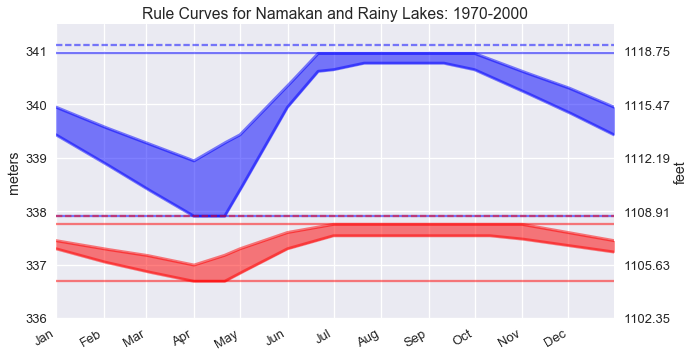

In [42]:
plt.figure(figsize=(10,6))
plotRC(NL1970,'b')
plotRC(RL1970,'r')
twiny()
plt.title('Rule Curves for Namakan and Rainy Lakes: 1970-2000')
saveRC('RuleCurve1970.png')

## <a name=section02></a>2000 Rule Curves for Rainy and Namakan Lakes

The [2001 Consolidated Order](http://www.ijc.org/files/tinymce/uploaded/2001-01-18_IJC_Order.pdf) of the International Joint Commission establishes the rule curves for Namakan and Rainy Lakes, and operating constraints for the dams at Kettle Falls and International Falls. The consolidated order incorporates relevant language from the original [Order of 1949](http://www.ijc.org/files/tinymce/uploaded/1949-06-08_IJC_Order.pdf) and Supplemental Orders of [1957](http://www.ijc.org/files/tinymce/uploaded/1957-10-01_IJC_Order.pdf), [1970](http://www.ijc.org/files/tinymce/uploaded/1970-07-29_IJC_Order.pdf), and [2000](http://www.ijc.org/files/tinymce/uploaded/2000-01-05_IJC_Order.pdf), into a single document describing current regulations on the management of levels for Rainy Lake and the Namakan chain of lakes.

### Namakan Lake Rule Curve 2000

In [21]:
# Namakan Lake

ELW = {
    datetime.datetime(yr, 1, 1): 337.90,
    datetime.datetime(yr,12,31): 337.90
}

EDL = {
    datetime.datetime(yr, 1, 1): 338.95,
    datetime.datetime(yr, 6,30): 338.95,
    datetime.datetime(yr, 7, 1): 340.15,
    datetime.datetime(yr, 9,30): 340.15,
    datetime.datetime(yr,12,31): 338.95
}

LRC = {
    datetime.datetime(yr, 1, 1): 339.70,
    datetime.datetime(yr, 4, 1): 338.95,
    datetime.datetime(yr, 4,15): 338.95,
    datetime.datetime(yr, 6, 7): 340.70,
    datetime.datetime(yr, 9, 1): 340.45,
    datetime.datetime(yr,10, 1): 340.45,
    datetime.datetime(yr,12,31): 339.70
}

URC = {
    datetime.datetime(yr, 1, 1): 340.00,
    datetime.datetime(yr, 4, 1): 339.70,
    datetime.datetime(yr, 6, 1): 340.95,
    datetime.datetime(yr, 9, 1): 340.65,
    datetime.datetime(yr,10, 1): 340.65,
    datetime.datetime(yr,12,31): 340.00
}

EHW = {
    datetime.datetime(yr, 1, 1): 340.95,
    datetime.datetime(yr,12,31): 340.95
}

AGO = {
    datetime.datetime(yr, 1, 1): 341.10,
    datetime.datetime(yr,12,31): 341.10
}

NL2000 = pd.concat([pd.Series(ELW),pd.Series(EDL),pd.Series(LRC),
                    pd.Series(URC),pd.Series(EHW),pd.Series(AGO)], axis=1)
NL2000.columns = ['ELW','EDL','LRC','URC','EHW','AGO']
NL2000 = NL2000.resample(rule='1D').interpolate()

### Rainy Lake Rule Curve 2000

In [22]:
# Rainy Lake

ELW = {
    datetime.datetime(yr, 1, 1): 336.68,
    datetime.datetime(yr,12,31): 336.68
}

LRC = {
    datetime.datetime(yr, 1, 1): 337.20,
    datetime.datetime(yr, 4, 1): 336.70,
    datetime.datetime(yr, 5, 1): 336.80,
    datetime.datetime(yr, 6, 1): 337.30,
    datetime.datetime(yr, 7, 1): 337.50,
    datetime.datetime(yr, 8,15): 337.50,
    datetime.datetime(yr,12, 1): 337.30,
    datetime.datetime(yr,12,31): 337.20
}

URC = {
    datetime.datetime(yr, 1, 1): 337.45,
    datetime.datetime(yr, 4, 1): 337.00,
    datetime.datetime(yr, 5, 1): 337.40,
    datetime.datetime(yr, 6, 1): 337.60,
    datetime.datetime(yr, 7, 1): 337.75,
    datetime.datetime(yr, 8,15): 337.75,
    datetime.datetime(yr,12, 1): 337.60,
    datetime.datetime(yr,12,31): 337.45
}

EDL = {
    datetime.datetime(yr, 1, 1): 336.90,
    datetime.datetime(yr, 4, 1): 336.70,
    datetime.datetime(yr, 6,30): 336.70,
    datetime.datetime(yr, 7, 1): 337.20,
    datetime.datetime(yr,10,24): 337.20,
    datetime.datetime(yr,12,31): 336.90
}

EHW = {
    datetime.datetime(yr, 1, 1): 337.75,
    datetime.datetime(yr,12,31): 337.75
}

AGO = {
    datetime.datetime(yr, 1, 1): 337.90,
    datetime.datetime(yr,12,31): 337.90
}

RL2000 = pd.concat([pd.Series(ELW),pd.Series(LRC),pd.Series(URC),
                    pd.Series(EDL),pd.Series(EHW),pd.Series(AGO)], axis=1)
RL2000.columns = ['ELW','LRC','URC','EDL','EHW','AGO']
RL2000 = RL2000.resample(rule='1D').interpolate()


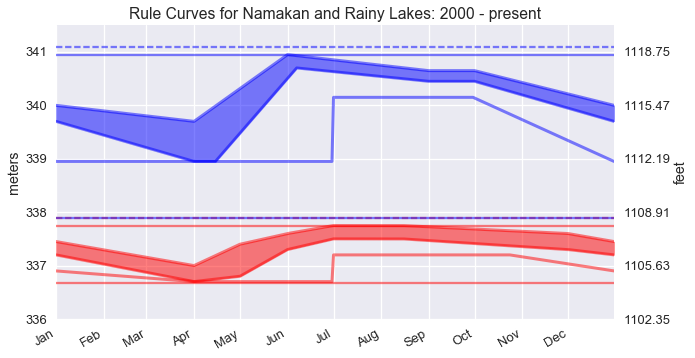

In [41]:
plt.figure(figsize=(10,6))
plotRC(RL2000,'r')
plotRC(NL2000,'b')
twiny()
plt.title('Rule Curves for Namakan and Rainy Lakes: 2000 - present')
saveRC('RuleCurve2000.png')

## <a name=section03></a>Graphical Comparison of 1970 and 2000 Rule Curves

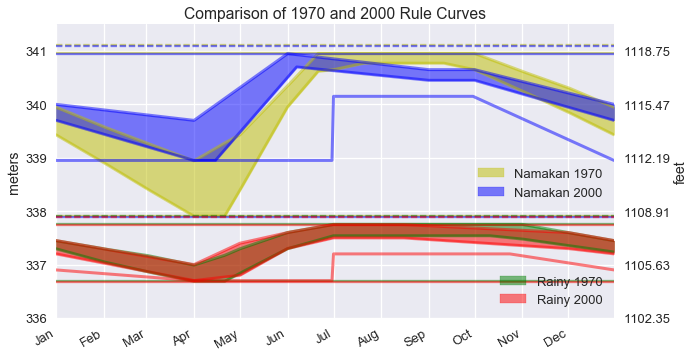

In [47]:

plt.figure(figsize=(10,6))
plotRC(NL1970,'y')
plotRC(RL1970,'g')
plotRC(NL2000,'b')
plotRC(RL2000,'r')

plt.title('Comparison of 1970 and 2000 Rule Curves')

import matplotlib.patches as mpatches

gold_patch = mpatches.Patch(color='y', alpha = 0.5, label='Namakan 1970')
blue_patch = mpatches.Patch(color='b', alpha = 0.5, label='Namakan 2000')
green_patch = mpatches.Patch(color='g', alpha = 0.5, label='Rainy 1970')
red_patch = mpatches.Patch(color='r', alpha = 0.5, label='Rainy 2000')

nlegend = plt.legend(handles=[gold_patch,blue_patch],bbox_to_anchor=[1.0,0.55])
plt.gca().add_artist(nlegend)
plt.legend(handles=[green_patch,red_patch],loc=4)

twiny()

saveRC('RuleCurveComparison.png')

## <a name=section04></a>Pickle Rule Curves to Data Files

In [11]:
NL1970.to_pickle(dir+'NL1970.pkl')
RL1970.to_pickle(dir+'RL1970.pkl')

NL2000.to_pickle(dir+'NL2000.pkl')
RL2000.to_pickle(dir+'RL2000.pkl')

In [12]:
RL2000.head()

,ELW,LRC,URC,EDL,EHW,AGO
2014-01-01,336.68,337.200000,337.450,336.900000,337.75,337.9
2014-01-02,336.68,337.194444,337.445,336.897778,337.75,337.9
2014-01-03,336.68,337.188889,337.440,336.895556,337.75,337.9
2014-01-04,336.68,337.183333,337.435,336.893333,337.75,337.9
2014-01-05,336.68,337.177778,337.430,336.891111,337.75,337.9
